<a href="https://colab.research.google.com/github/A01286211/M2-Act5_SZD/blob/main/DataTransformation-SebastianZargaoza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Transformation

#### Sebastián Zaragoza Díaz A01286211
#### Análisis de Ciencia de Datos (Gpo 101)
#### 24/02/25

Data in different scales.

Values in a dataset might have a variety of different magnitudes, ranges, or scales.
Algorithms that use distance as a parameter may not weigh all these in the same way.
There are various data transformation techniques that are used to transform the features of our data so that they use the same scale, magnitude, or range.
This ensures that each feature has an appropriate effect on a model's predictions.
Some features in our data might have high-magnitude values (for example, annual salary), while others might have relatively low values (for example, the number of years worked at a company). Just because some data has smaller values does not mean it is less significant.

Reference: Data Science with Python
By Rohan Chopra, Aaron England, Mohamed Noordeen Alaudeen
July 2019

https://subscription.packtpub.com/book/data/9781838552862/1/ch01lvl1sec08/data-in-different-scales

## Implementing Scaling Using the Standard Scaler Method

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Wholesale customers data.csv')

In [30]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [31]:
dtypes = df.dtypes
dtypes

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Perform standard scaling and print the first five rows of the new dataset. To do so, use the StandardScaler() class from sklearn.preprocessing and implement the fit_transorm() method.
Using the StandardScaler method, we will scale the data into a uniform unit over all the columns.
The values of all the features will be converted into a uniform range of the same scale. Because of this, it becomes easier for the model to make predictions.

In [33]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit_transform(df)
scaled_frame = pd.DataFrame(std_scale, columns=df.columns)

scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## Implementing Scaling Using the MinMax Scaler Method

Perform MinMax scaling and print the initial five values of the new dataset. To do so, use the MinMaxScaler() class from sklearn.preprocessing and implement the fit_transorm() method. Add the following code to implement this:
Using the MinMaxScaler method, we will scale the data into a uniform unit over all the columns

In [34]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit_transform(df)
scaled_frame = pd.DataFrame(minmax_scale,columns=df.columns)
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


### b)  Escribe el código requerido para obtener:
  1) el total de lo que se gastó de leche por región, y
  2) el total de lo que se gastó de abarrotes por canal.

In [35]:
# Total de lo que se gastó de leche por región.
region = df.groupby('Region')
milk_region = region['Milk']

milk_region.sum()

,Milk
Region,
1,422454
2,239144
3,1888759


In [36]:
# Total de lo que se gastó de abarrotes por canal
canales = df.groupby('Channel')
snacks_canal = canales['Grocery']
snacks_canal.sum()

,Grocery
Channel,
1,1180717
2,2317845


d) One-Hot Encoding

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
data = {
    'Nombre' : ['Ana', 'Luis', 'Sofía', 'Pedro', 'Elena'],
    'Ciudad': ['Monterrey', 'Guadalajara', 'CDMX', 'Monterrey', 'Guadalajara'],
    'Edad' : [25, 30, 28, 35, 27]
}

df2 = pd.DataFrame(data)
df2

,Nombre,Ciudad,Edad
0,Ana,Monterrey,25
1,Luis,Guadalajara,30
2,Sofía,CDMX,28
3,Pedro,Monterrey,35
4,Elena,Guadalajara,27


In [39]:
df2_encoded = pd.get_dummies(df2, columns=['Ciudad'])
df2_encoded

,Nombre,Edad,Ciudad_CDMX,Ciudad_Guadalajara,Ciudad_Monterrey
0,Ana,25,False,False,True
1,Luis,30,False,True,False
2,Sofía,28,True,False,False
3,Pedro,35,False,False,True
4,Elena,27,False,True,False


## Mapa Mental

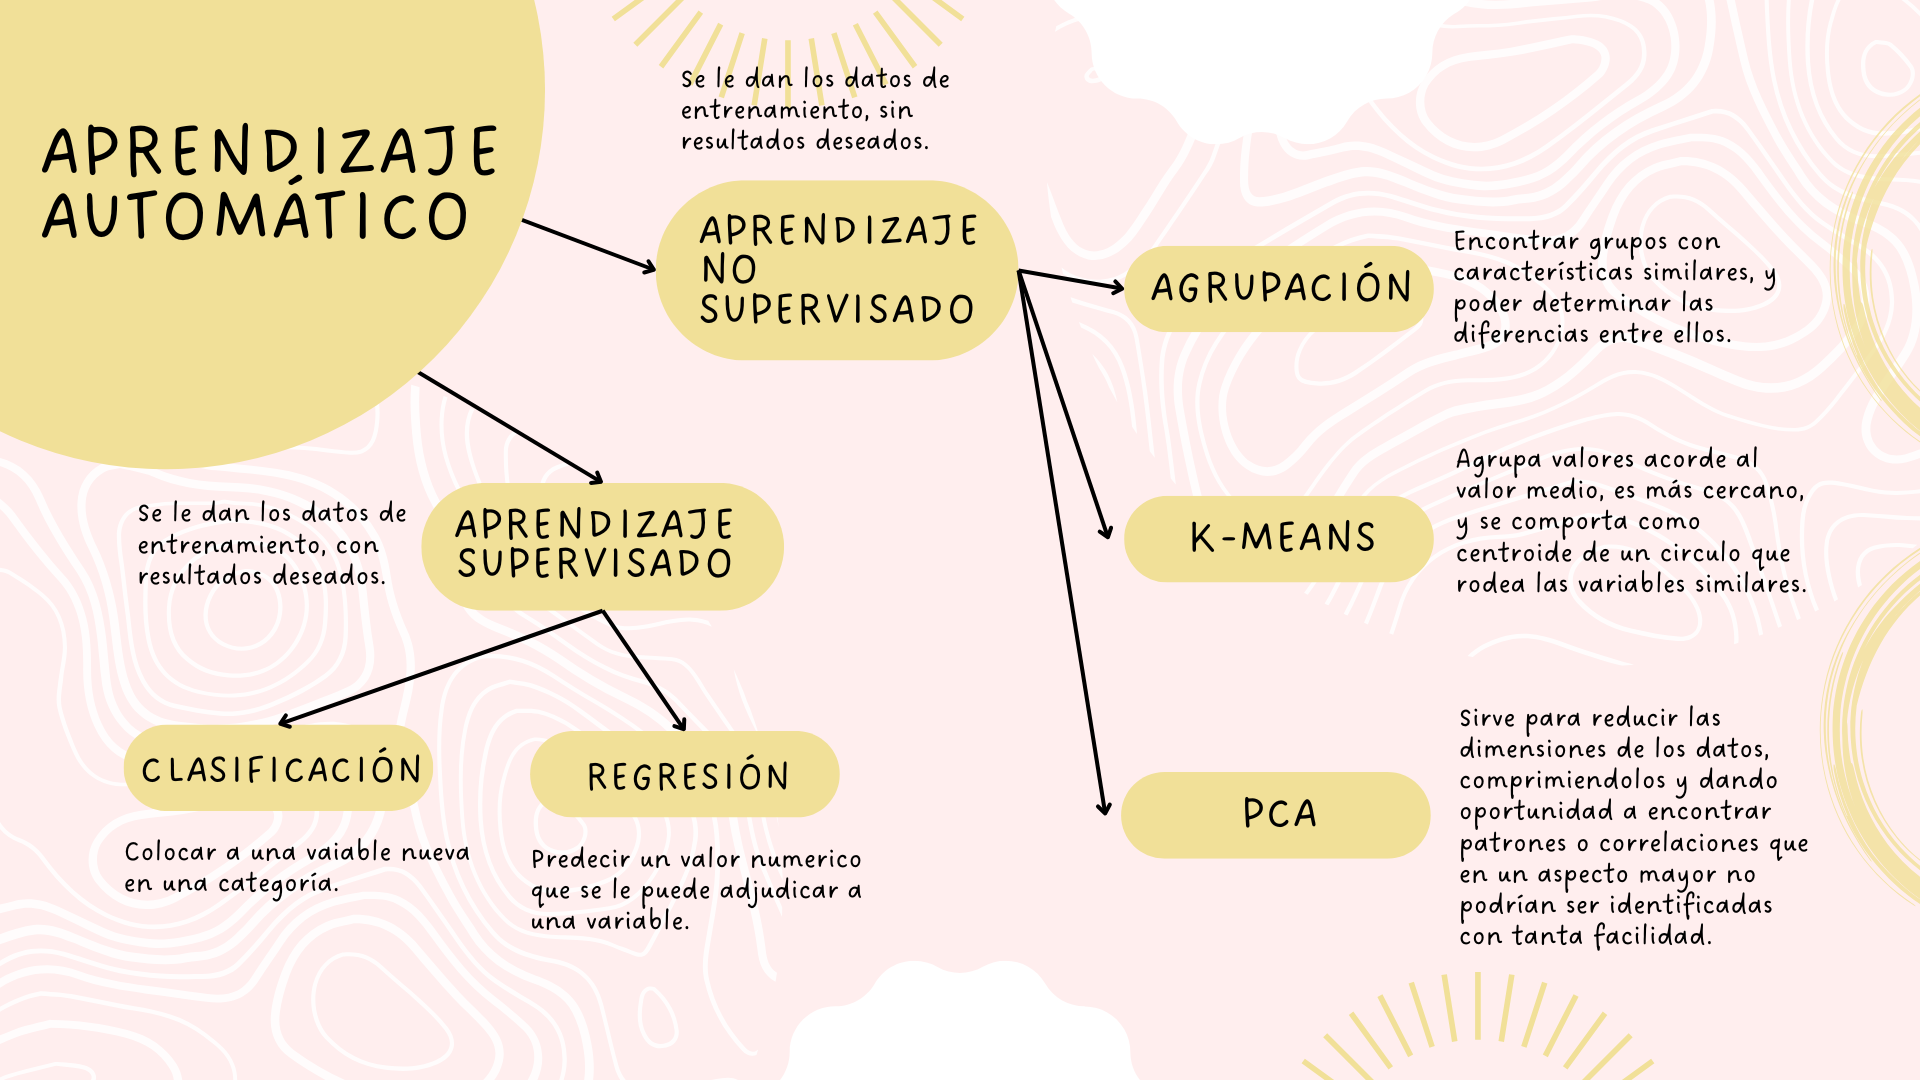

## Elbow Method Problem

In [40]:
df = pd.read_excel('/content/drive/MyDrive/datasets/Copia de Course Evaluation (Responses).xlsx')
df

,Timestamp,Name of Student,Registration number,Describe the course contents and course design in terms of level of preparedness [Course contents],Describe the course contents and course design in terms of level of preparedness [Teacher preparedness],Describe the course contents and course design in terms of level of preparedness [Student engagement],Describe the course contents and course design in terms of level of preparedness [Course coverage],Describe the course contents and course design in terms of level of preparedness [Discussion and respond to questions],How course helped in improving the level of learning in terms of learning outcomes [Level of skill/knowledge at start of course],How course helped in improving the level of learning in terms of learning outcomes [Level of skill/knowledge at end of course],...,Skill and responsiveness of the instructor [Instructor was available and helpful],Skill and responsiveness of the instructor [Grading was prompt and had useful feedback],Course content [Learning objectives were clear],Course content [Course content was organized and well planned],Course content [Course workload was appropriate],Course content [Course organized to allow all students to participate fully],What aspects of this course were most useful or valuable?,How would you improve this course?,Describe the experience of engagement in the project assigned in this course,Name one skill or aspect that you gained after completing this course
0,2024-05-25 14:54:06.007,Arhum Waseem,1024-BSME-FET/F-21,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,...,Neutral,Agree,Agree,Agree,Agree,Agree,Design For Maximum Output,By Providing Slides To Students,Learning experience beyond text book level ext...,Life long learning
1,2024-05-25 14:56:59.385,Saud Asif,990-FET/BSME/F21,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,"Brain Storming for solution of a problem, proj...",Introduce projects that connect students with ...,Learning experience beyond text book level ext...,Identifying the end users and Response gatheri...
2,2024-05-25 14:59:13.970,Muhammad Hammad Sohail,1012-FET/BSME/F21,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,"We learn different skills like gantt chart, df...",One things i wanna improve in this course is i...,Learning experience beyond text book level ext...,"Product development cycle, Use of Modern tools..."
3,2024-05-25 15:07:56.230,Muhammad Amir Taj,997/F21/BSME,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,The course had well-defined objectives and goa...,I think the course was perfect.,Learning experience beyond text book level ext...,"Use of Modern tools in product development, Li..."
4,2024-05-25 15:12:50.812,M.Talha saoud,1002/bsme/f-21,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,This help me to improve my skills for a busine...,Please add some content related to entrepreneu...,Learning experience beyond text book level ext...,Life long learning
5,2024-05-25 15:23:40.768,Syed Zille Abbas Kazmi,1006-FET-BSME-F-21,Excellent,Excellent,Fair,Very good,Excellent,Satisfactory,Excellent,...,Strongly agree,Agree,Agree,Strongly agree,Neutral,Neutral,Helped a lot in designing processes and critic...,By doing practical class activities,Learning experience beyond text book level ext...,"Product development cycle, Identifying the end..."
6,2024-05-25 19:58:43.462,Muhammad hunain,999-FET/BSME/F21,Satisfactory,Satisfactory,Excellent,Excellent,Very good,Satisfactory,Excellent,...,Strongly agree,Agree,Neutral,Agree,Strongly agree,Agree,

In [41]:
!pip install squarify

In [42]:
# Se importan librerías necesarias.
import squarify
import numpy as np
from matplotlib.colors import to_rgba

In [43]:
# Se renombran las preguntas para mejor entendimiento
new_column_titles = [
    "Timestamp",
    "Name of Student",
    "Registration Number",
    "Course Content Preparedness",
    "Teacher Preparedness",
    "Student Engagement",
    "Course Coverage",
    "Discussion and Response",
    "Skill/Knowledge at Start",
    "Skill/Knowledge at End",
    "Skill/Knowledge Required",
    "Contribution to Skill/Knowledge",
    "Instructor Effectiveness",
    "Presentation Clarity",
    "Stimulation of Interest",
    "Effective Use of Time",
    "Instructor Availability",
    "Grading and Feedback",
    "Clarity of Learning Objectives",
    "Organization and Planning",
    "Appropriateness of Workload",
    "Student Participation",
    "Course Usefulness",
    "Course Improvement Suggestions",
    "Project Engagement Experience",
    "Skills or Aspects Gained"
]

df.columns = new_column_titles
df.head()

,Timestamp,Name of Student,Registration Number,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,...,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation,Course Usefulness,Course Improvement Suggestions,Project Engagement Experience,Skills or Aspects Gained
0,2024-05-25 14:54:06.007,Arhum Waseem,1024-BSME-FET/F-21,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,...,Neutral,Agree,Agree,Agree,Agree,Agree,Design For Maximum Output,By Providing Slides To Students,Learning experience beyond text book level ext...,Life long learning
1,2024-05-25 14:56:59.385,Saud Asif,990-FET/BSME/F21,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,"Brain Storming for solution of a problem, proj...",Introduce projects that connect students with ...,Learning experience beyond text book level ext...,Identifying the end users and Response gatheri...
2,2024-05-25 14:59:13.970,Muhammad Hammad Sohail,1012-FET/BSME/F21,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,"We learn different skills like gantt chart, df...",One things i wanna improve in this course is i...,Learning experience beyond text book level ext...,"Product development cycle, Use of Modern tools..."
3,2024-05-25 15:07:56.230,Muhammad Amir Taj,997/F21/BSME,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,The course had well-defined objectives and goa...,I think the course was perfect.,Learning experience beyond text book level ext...,"Use of Modern tools in product development, Li..."
4,2024-05-25 15:12:50.812,M.Talha saoud,1002/bsme/f-21,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,This help me to improve my skills for a busine...,Please add some content related to entrepreneu...,Learning experience beyond text book level ext...,Life long learning


In [44]:
# Se calculan índices de columnas a quitar, y se quitan.
columns_to_remove_indices = [0, 1, 2] + list(range(df.shape[1] - 3, df.shape[1]))
df = df.drop(columns=df.columns[columns_to_remove_indices])
df

,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,Skill/Knowledge Required,Contribution to Skill/Knowledge,Instructor Effectiveness,Presentation Clarity,Stimulation of Interest,Effective Use of Time,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation,Course Usefulness
0,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,Very good,Very good,Agree,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree,Design For Maximum Output
1,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,Very good,Very good,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,"Brain Storming for solution of a problem, proj..."
2,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,"We learn different skills like gantt chart, df..."
3,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,The course had well-defined objectives and goa...
4,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,Excellent,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,This help me to improve my skills for a busine...
5,Excellent,Excellent,Fair,Very good,Excellent,Satisfactory,Excellent,Satisfactory,Excellent,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Neutral,Neutral,Helped a lot in designing processes and critic...
6,Satisfactory,Satisfactory,Excellent,Excellent,Very good,Satisfactory,Excellent,Very good,Excellent,Strongly agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Neutral,Agree,Strongly agree,Agree,Teacher's teaching method was excellent and di...
7,Excellent,Excellent,Excellent,Excellent,Excellent,Very good,Excellent,Very good,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Being practical work
8,Very good,Very good,Very good,Excellent,Excellent,Excellent,Excellent,Very good,Excellent,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Strongly agree,To find out dialy life problem and solve it
9,Very good,Excellent,Very good,Excellent,Very good,Fair,Very good,Very good,Satisfactory,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Neutral,Agree,Strongly agree,Neutral,Agree,Think Outside of the Box.


In [45]:
# Se borra la última columna
df = df.iloc[:, :-1]
df

,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,Skill/Knowledge Required,Contribution to Skill/Knowledge,Instructor Effectiveness,Presentation Clarity,Stimulation of Interest,Effective Use of Time,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation
0,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,Very good,Very good,Agree,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree
1,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,Very good,Very good,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree
2,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
4,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,Excellent,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
5,Excellent,Excellent,Fair,Very good,Excellent,Satisfactory,Excellent,Satisfactory,Excellent,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Neutral,Neutral
6,Satisfactory,Satisfactory,Excellent,Excellent,Very good,Satisfactory,Excellent,Very good,Excellent,Strongly agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Neutral,Agree,Strongly agree,Agree
7,Excellent,Excellent,Excellent,Excellent,Excellent,Very good,Excellent,Very good,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
8,Very good,Very good,Very good,Excellent,Excellent,Excellent,Excellent,Very good,Excellent,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Strongly agree
9,Very good,Excellent,Very good,Excellent,Very good,Fair,Very good,Very good,Satisfactory,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Neutral,Agree,Strongly agree,Neutral,Agree


In [46]:
# Se borra la última fila
df = df.iloc[:-1]
df

,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,Skill/Knowledge Required,Contribution to Skill/Knowledge,Instructor Effectiveness,Presentation Clarity,Stimulation of Interest,Effective Use of Time,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation
0,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,Very good,Very good,Agree,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree
1,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,Very good,Very good,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree
2,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
4,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,Excellent,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
5,Excellent,Excellent,Fair,Very good,Excellent,Satisfactory,Excellent,Satisfactory,Excellent,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Neutral,Neutral
6,Satisfactory,Satisfactory,Excellent,Excellent,Very good,Satisfactory,Excellent,Very good,Excellent,Strongly agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Neutral,Agree,Strongly agree,Agree
7,Excellent,Excellent,Excellent,Excellent,Excellent,Very good,Excellent,Very good,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
8,Very good,Very good,Very good,Excellent,Excellent,Excellent,Excellent,Very good,Excellent,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Strongly agree
9,Very good,Excellent,Very good,Excellent,Very good,Fair,Very good,Very good,Satisfactory,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Neutral,Agree,Strongly agree,Neutral,Agree


In [47]:
# Se definen mapeos para dar valor numérico a las respuestas cualitativas.
custom_mappings = {
    "Course Content Preparedness": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Teacher Preparedness": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Student Engagement": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Course Coverage": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Discussion and Response": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Skill/Knowledge at Start": {"Poor": 1, "Fair": 2, "Satisfactory": 3, "Very good": 4, "Excellent": 5},
    "Skill/Knowledge at End": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Skill/Knowledge Required": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Contribution to Skill/Knowledge": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Instructor Effectiveness": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Presentation Clarity": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Stimulation of Interest": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Effective Use of Time": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Instructor Availability": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Grading and Feedback": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Clarity of Learning Objectives": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Organization and Planning": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Appropriateness of Workload": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Student Participation": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
}

# Se aplican los mapeos
df_encoded = df.copy()
for column, mapping in custom_mappings.items():
    df_encoded[column] = df_encoded[column].map(mapping)

# Display the encoded DataFrame
print("Encoded DataFrame:")
df_encoded

Encoded DataFrame:


,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,Skill/Knowledge Required,Contribution to Skill/Knowledge,Instructor Effectiveness,Presentation Clarity,Stimulation of Interest,Effective Use of Time,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation
0,3,3,2,4,4,3,3,3,3,3,3,3,3,3,3,4,4,4,4
1,4,4,3,4,4,2,4,3,3,4,4,3,4,5,4,5,4,4,5
2,4,3,4,4,4,4,4,4,4,3,4,4,4,5,4,5,5,5,5
3,4,4,3,4,4,5,4,4,4,4,4,4,4,5,4,5,5,5,5
4,4,4,3,3,3,5,4,4,4,4,4,4,4,5,4,1,1,1,1
5,4,4,1,3,4,3,4,2,4,4,4,3,4,5,3,4,5,3,3
6,2,2,4,4,3,3,4,3,4,4,3,4,3,5,3,3,4,5,4
7,4,4,4,4,4,4,4,3,4,4,4,4,4,5,4,5,5,5,5
8,3,3,3,4,4,5,4,3,4,4,3,4,4,5,4,4,4,5,5
9,3,4,3,4,3,2,3,3,2,4,4,3,4,4,2,4,5,3,4


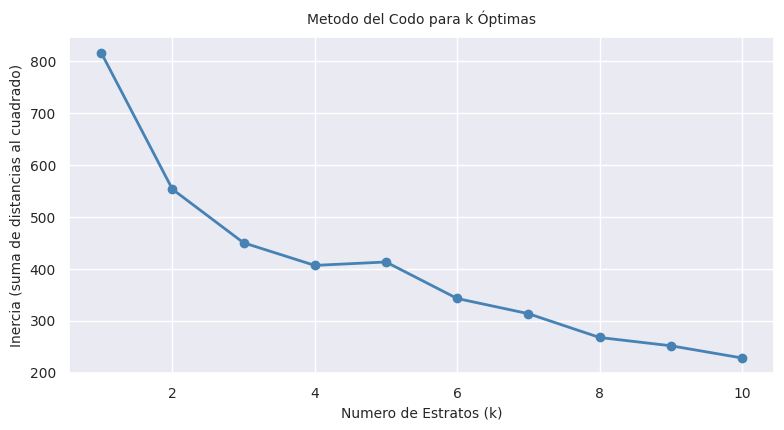

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Se normalizan los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))

# Curva de Codo
plt.subplot(2, 1, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-', color='steelblue', linewidth=2, markersize=6)
plt.title('Metodo del Codo para k Óptimas', fontsize=10, pad=10)
plt.xlabel('Numero de Estratos (k)', fontsize=10)
plt.ylabel('Inercia (suma de distancias al cuadrado)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


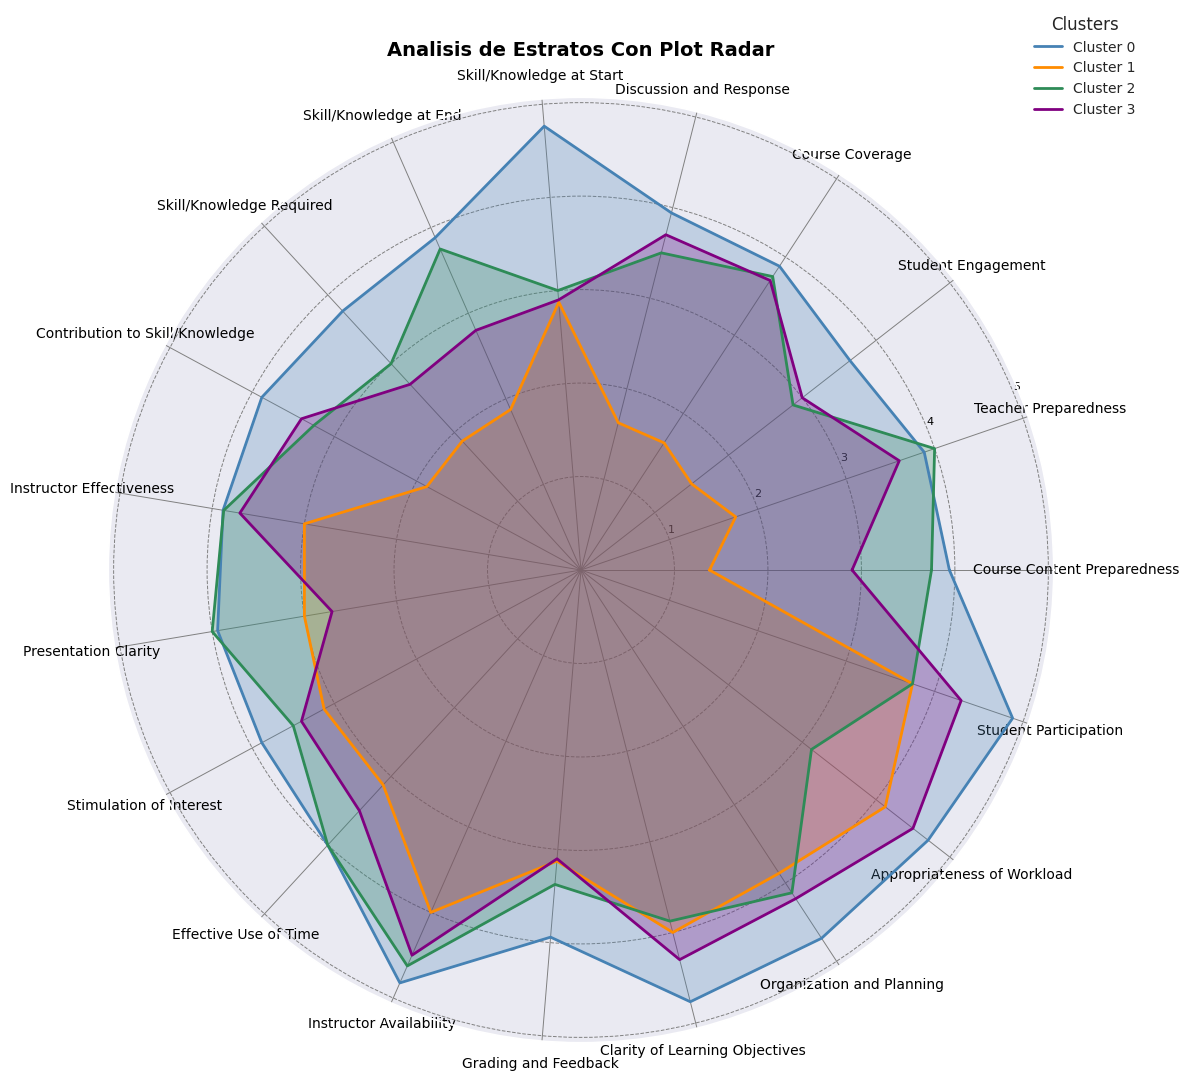

In [56]:
# Se aplica estratos con k = 4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

cluster_averages = df_encoded.groupby('Cluster').mean()

features = cluster_averages.columns.tolist()
num_features = len(features)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

colors = ['steelblue', 'darkorange', 'seagreen', 'purple']
for cluster in range(cluster_averages.shape[0]):
    values = cluster_averages.iloc[cluster].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {cluster}', linewidth=2, color=colors[cluster], linestyle='solid')
    ax.fill(angles, values, alpha=0.25, color=colors[cluster])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=10, color='black')

ax.tick_params(axis='y', labelsize=8, colors='black')
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')
ax.xaxis.grid(True, linestyle='-', linewidth=0.7, color='gray')
plt.title('Analisis de Estratos Con Plot Radar', size=14, pad=30, color='black', fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10, frameon=False, title='Clusters')
plt.tight_layout()
plt.show()


In [60]:
# Step 3: Analyze the clusters
# Display the cluster assignments
print("Cluster assignments:\n")
print(df_encoded['Cluster'].value_counts())

# Analyze each cluster by feature averages
cluster_analysis = df_encoded.groupby('Cluster').mean()
print("\nCluster analysis (feature averages):\n")
cluster_analysis

Cluster assignments:

Cluster
0    17
3    10
2     8
1     8
Name: count, dtype: int64

Cluster analysis (feature averages):



,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,Skill/Knowledge Required,Contribution to Skill/Knowledge,Instructor Effectiveness,Presentation Clarity,Stimulation of Interest,Effective Use of Time,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation
Cluster,,,,,,,,,,,,,,,,,,,
0,3.941176,3.882353,3.647059,3.882353,3.941176,4.764706,3.882353,3.764706,3.882353,3.882353,3.941176,3.882353,4.000,4.823529,3.941176,4.764706,4.705882,4.705882,4.882353
1,1.375000,1.750000,1.500000,1.625000,1.625000,2.875000,1.875000,1.875000,1.875000,3.000000,3.000000,3.125000,3.125,4.000000,3.125000,4.000000,3.875000,4.125000,3.750000
2,3.750000,4.000000,2.875000,3.750000,3.500000,3.000000,3.750000,3.000000,3.250000,3.875000,4.000000,3.500000,4.000,4.625000,3.375000,3.875000,4.125000,3.125000,3.750000
3,2.900000,3.600000,3.000000,3.700000,3.700000,2.900000,2.800000,2.700000,3.400000,3.700000,2.700000,3.400000,3.500,4.500000,3.100000,4.300000,4.200000,4.500000,4.300000


### Interpretación de Resultados

Al ver los resultados y clusters obtenidos, es claro que el cluster 1, tiene la tendencia a responder cosas más negativas, y en el otro extremo esta el cluster 0, quienes tienen en promedio respuestas más positivas que el resto. Entre estas estan el cluster 2 y 3, y se diferencian en preguntas más específicas, por ejemplo, en la categoría 'Appropiateness of Workload' cluster 2 tuvo una respuesta más negativa que cluster 3, así como en la categoría 'Presentation Clarity' donde cluster 3 presentó una respuesta mucho más negativa que el #2.

Estos resultados segmentan los datos y de esta manera, cómo se acaba de hacer, se puede tener una visión mucha más clara de los grupos de personas con características similares, y de esta manera la toma de desiciones puede ser mucho más informada, adaptada y específica a grupos de persona con características muy similares. Un ejemplo claro donde este análisis serviría, es en el caso de negocios, ya que un análisis utilizando estos métodos podría ayudar a un negocio a reconocer a su mercado meta, adaptar la campaña de marketing de un producto en decadencia, etc.
